In [1]:
%matplotlib inline
from sutils import *
import os, json
from glob import glob

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
limit_gpu_mem()

In [3]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
input_shape

(28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(Inp)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

In [10]:
model = Model(Inp,output)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
__________

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 321s - loss: 0.3279 - acc: 0.9012 - val_loss: 0.0784 - val_acc: 0.9758
Epoch 2/10
60000/60000 [==============================] - 333s - loss: 0.1106 - acc: 0.9672 - val_loss: 0.0516 - val_acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 327s - loss: 0.0867 - acc: 0.9742 - val_loss: 0.0430 - val_acc: 0.9855
Epoch 4/10
60000/60000 [==============================] - 321s - loss: 0.0720 - acc: 0.9787 - val_loss: 0.0420 - val_acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 225s - loss: 0.0621 - acc: 0.9814 - val_loss: 0.0387 - val_acc: 0.9865
Epoch 6/10
60000/60000 [==============================] - 285s - loss: 0.0569 - acc: 0.9833 - val_loss: 0.0340 - val_acc: 0.9873
Epoch 7/10
60000/60000 [==============================] - 320s - loss: 0.0517 - acc: 0.9848 - val_loss: 0.0308 - val_acc: 0.9895
Epoch 8/10
60000/60000 [=======================

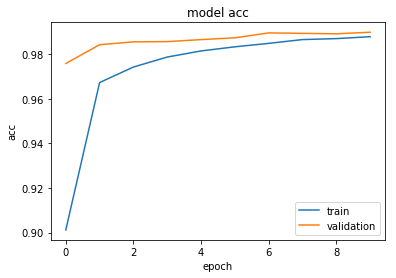

In [14]:
plot_train(hist)

In [15]:
model.save_weights('basic_cnn.h5')

In [16]:
model.save('cnn_model')

In [23]:
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(Inp)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

In [24]:
model = Model(Inp,output)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 256)         0         
__________